We use unsupervised approach when our dataset has no target feature/column i.e., the dataset is unlabelled.<br> The basic branches of unsupervised learning are:
1. Clustering

2. Association

3. Dimensionality Reduction

In this notebook, I will discuss the clustering approach and implement few clustering based algorithms.

Clustering simply groups the data points into different groups based on the similar characteristics.The main goal of the clustering algorithm is to create the clusters that has high intracluster and low intercluster distance. Clustering also has multiple types.   

<b>Types of clustering approaches:<br></b>
Centroid based clustering: <b>K-means clustering<br></b>
Density based clustering: <b>DBSCAN<br></b>
Hierarchical clusteing:#####




<h2>K-means clustering:</h2> Distance based clustering algorithm. We can use any distance metrix. Like euclidean distance(l2), manhatton distance(l1), cosine distance (angle base). Updated version: K-means++ that solves the problem of convergence (random cluster initialization) to some extent. We have another version that is K-mediods that makes the actual datapoint a centroid instead of imaginary cluster point. <br>

<b>Advantages of K-means clustering:<br></b>
1. Easy to understand
2. Easy to implement
3. Can handle large data well

<b>Disadvantages of K-means clustering:<br></b>
1. Affects by outliers.
2. Issue with convergence while initializing the centroids randomly
3. Might get inefficient with higer dimensions data
4. We have to choose the value of K by ourselves. Yes, we have elbow method but also it is always not the best way to get the optimized value.


In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [13]:
data = pd.read_csv('dataset/student_clustering_data.csv')
data.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [15]:
data.shape

(200, 2)

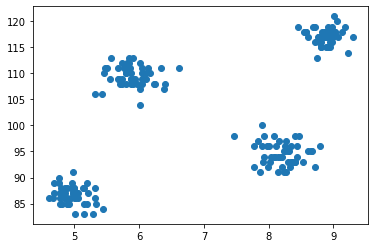

In [17]:
plt.scatter(data['cgpa'], data['iq'])

In [29]:
wcss_elbow = []
for i in range(1,20):
    knn = KMeans(n_clusters=i)
    knn.fit(data)
    wcss_elbow.append(knn.inertia_)

C:\Users\shree\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
wcss_elbow 

[29957.898287999997,
 4184.141269999999,
 2362.7133490000015,
 681.9696600000001,
 530.4298616986187,
 388.8524026875981,
 302.65349935820814,
 233.54082485509016,
 198.22433643678957,
 172.4919501547381,
 153.1273429785248,
 130.37033554696123,
 112.32981421218494,
 101.44196253967024,
 85.8383847573885,
 70.66074952831929,
 65.2199815512339,
 58.26743643052212,
 52.026079637877615]

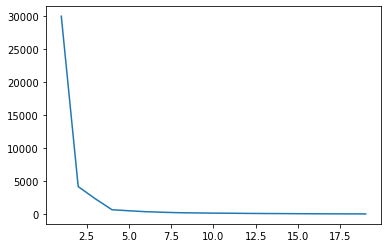

In [32]:
plt.plot(range(1,20),wcss_elbow)

The elbow point is 4 so the number of clusters for our dataset is 4 which is in fact right according to our dummy data.

In [33]:
wcss_elbow = []
for i in range(1,201):
    knn = KMeans(n_clusters=i)
    knn.fit(data)
    wcss_elbow.append(knn.inertia_)

C:\Users\shree\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shree\AppData\Local\Temp/ipykernel_16440/1420686825.py:4: ConvergenceWarning: Number of distinct clusters (193) found smaller than n_clusters (194). Possibly due to duplicate points in X.
  knn.fit(data)
C:\Users\shree\AppData\Local\Temp/ipykernel_16440/1420686825.py:4: ConvergenceWarning: Number of distinct clusters (193) found smaller than n_clusters (195). Possibly due to duplicate points in X.
  knn.fit(data)
C:\Users\shree\AppData\Local\Temp/ipykernel_16440/1420686825.py:4: ConvergenceWarning: Number of distinct clusters (193) found smaller than n_clusters (196). Possibly due to duplicate points in X.
  knn.fit(data)
C:\Users\shree\AppData\Local\Temp/ipykernel_16440/1420686825.py:4: Converg

In [34]:
wcss_elbow

[29957.898287999997,
 4184.141269999999,
 2364.0055834200834,
 681.9696600000001,
 514.1616803171117,
 398.4039118468834,
 295.4391895943191,
 233.54082485509016,
 209.33293809196988,
 176.07319712319224,
 153.73018844436325,
 139.8194731088377,
 111.4050276248833,
 93.12633999140566,
 83.43618237643615,
 77.58872636087098,
 66.71958575605686,
 62.074816092164816,
 53.67760904011928,
 49.223282489184825,
 43.30524109322051,
 38.390379931179936,
 34.05934937562437,
 31.38894445498945,
 28.221097232767235,
 24.430584693084683,
 22.350699454989453,
 18.578356121656114,
 16.12833889943389,
 14.076230010545006,
 12.457774216894222,
 10.969356439116448,
 9.578904216894227,
 8.999737550227563,
 8.924815883560894,
 7.937925883560893,
 7.386975883560891,
 6.678162550227557,
 6.313831457431462,
 5.839008362193367,
 5.607166716894221,
 5.089212528860035,
 4.895385425685429,
 4.463497063492066,
 4.232092290764793,
 3.9798907539682573,
 3.8412168145743166,
 3.5314825288600313,
 3.4182488492063507,


#since we now know that n_clusters = 4 is the best value for k, let's use it and do further process to make the clusters

In [35]:
X = data.iloc[:,:].values

In [36]:
knn_second = KMeans(n_clusters=4)
x = knn_second.fit_predict(X)

In [37]:
x

array([2, 3, 0, 0, 3, 3, 0, 1, 3, 0, 2, 3, 0, 2, 3, 0, 3, 0, 3, 3, 0, 2,
       0, 2, 2, 0, 2, 1, 0, 3, 1, 3, 1, 3, 0, 0, 1, 3, 2, 3, 2, 0, 0, 2,
       1, 1, 0, 3, 1, 3, 2, 2, 1, 0, 1, 3, 3, 1, 3, 1, 3, 0, 0, 1, 2, 1,
       0, 2, 3, 0, 3, 1, 0, 2, 3, 1, 3, 1, 2, 0, 0, 1, 3, 2, 1, 2, 1, 3,
       1, 3, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 3, 2, 2, 1, 2, 2, 0, 2, 1, 1,
       0, 1, 3, 3, 0, 1, 0, 3, 1, 2, 2, 3, 0, 1, 0, 2, 0, 3, 2, 0, 0, 3,
       2, 2, 3, 1, 3, 2, 0, 0, 0, 2, 3, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 1,
       2, 0, 3, 1, 3, 0, 2, 1, 3, 0, 1, 2, 3, 2, 2, 1, 1, 3, 1, 2, 2, 0,
       1, 3, 2, 1, 1, 3, 3, 3, 0, 2, 0, 0, 1, 3, 0, 0, 2, 2, 0, 2, 1, 3,
       3, 1])

In [44]:
knn_second.cluster_centers_

array([[  8.1998,  94.6   ],
       [  8.8714, 117.16  ],
       [  4.9676,  86.7   ],
       [  5.8948, 109.52  ]])

In [46]:
knn_second.n_iter_

3

In [48]:
knn_second.n_features_in_

2

In [50]:
X[x==0][0:5]

array([[ 8.36, 93.  ],
       [ 8.27, 97.  ],
       [ 8.41, 98.  ],
       [ 8.09, 94.  ],
       [ 8.16, 97.  ]])

In [51]:
X[x==1][0:5]

array([[  8.8 , 115.  ],
       [  9.18, 119.  ],
       [  8.86, 117.  ],
       [  8.83, 118.  ],
       [  8.56, 118.  ]])

In [52]:
X[x==2][0:5]

array([[ 5.13, 88.  ],
       [ 4.6 , 86.  ],
       [ 5.  , 88.  ],
       [ 4.86, 86.  ],
       [ 4.78, 87.  ]])

In [53]:
X[x==3][0:5]

array([[  5.9 , 113.  ],
       [  5.45, 110.  ],
       [  5.88, 109.  ],
       [  5.79, 110.  ],
       [  6.1 , 110.  ]])

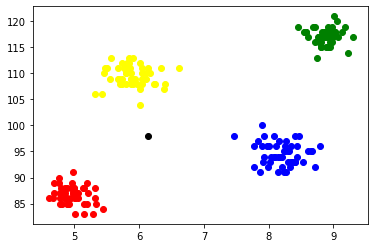

In [64]:
plt.scatter(X[x==0,0],X[x==0,1],color='blue')
plt.scatter(X[x==1,0],X[x==1,1],color='green')
plt.scatter(X[x==2,0],X[x==2,1],color='red')
plt.scatter(X[x==3,0],X[x==3,1],color='yellow')
plt.scatter(6.13,98,color='black')

In [63]:
knn_second.predict([[6.13,98]])

array([0])